# Data Science and Business Analytics Intern - #GRIPSEPT22

Author-Antima Jain

# Task-1: Prediction using Supervised ML (Linear Regression)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
url='https://bit.ly/w-data'
dataset=pd.read_csv(url)

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Analysis and Visualization

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


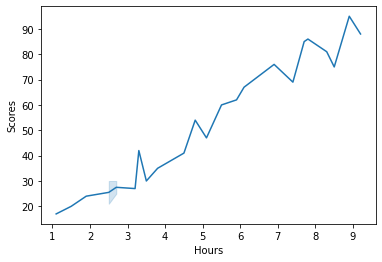

In [8]:
#Plotting distribution of scores
sns.lineplot(x='Hours',y='Scores',data=dataset)
plt.show()

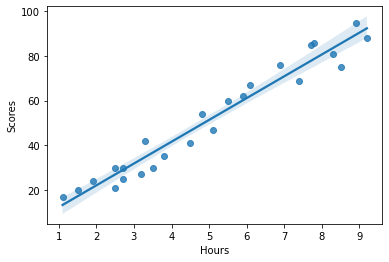

In [9]:
sns.regplot(x='Hours',y='Scores',data=dataset)
plt.show()

# Dependent and Independent Features

In [10]:
#independent variable
x=dataset.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
#dependent variable
y=dataset.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting training and test data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0 )

In [13]:
len(y_train)

18

In [14]:
y_test

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

In [15]:
len(y_test)

7

# Finding the best fit line

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
model=linear_model.LinearRegression()
#Trains the model on training data
model.fit(x_train, y_train)

LinearRegression()

In [18]:
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [9.94167834]
Intercept: 1.932204253151646


In [19]:
#Predicting for test data
y_pred=model.predict(x_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [20]:
#Comparing actual vs prediced
df=pd.DataFrame({'Actual_Scores':y_test,'Predicted':y_pred})
df

,Actual_Scores,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [21]:
#error terms
MSE=mean_squared_error(y_test, y_pred)
MSE=round(MSE, 2)
print("Mean squared error is:", MSE)
MAE=mean_absolute_error(y_test, y_pred)
MAE=round(MAE, 2)
print("Mean absolute error is:", MAE)

Mean squared error is: 20.33
Mean absolute error is: 4.13


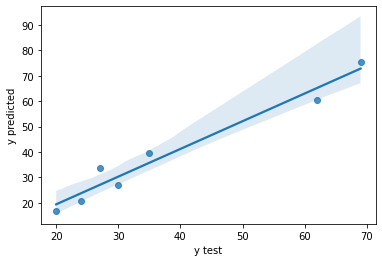

In [22]:
#Plotting best fit line
sns.regplot(y_test,y_pred)
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.show()

# Predicting score if a student studies for 9.25 hours/day

In [23]:
hours = np.array([[9.25]])
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(np.round(own_pred[0],2)))

No of Hours = [[9.25]]
Predicted Score = 93.89


# Thank You